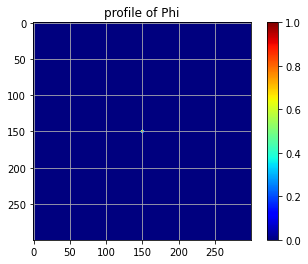

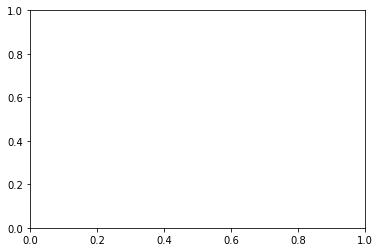

Total runtime of the module is 7.7041743437449135 minutes


In [5]:
# Code to Measure time taken by module to execute.
import time

# store starting time
begin1 = time.time()

import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.animation as animation #Added for the purpose of animation
from IPython.display import HTML #Added for the purpose of animation

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

#Simulation Cell Parameters
Nx = 300
Ny = 300

dx = 0.03
dy = 0.03
#Time Integration Parameters
nstep = 4000
nprint = 2 
dtime = 1e-4
#Material Specific Parameters
tau = 0.0003
epsilonb = 0.01
kappa = 1.8
delta = 0.02
aniso = 6
alpha = 0.9
gamma = 10
teq = 1
theta0 = 0
seed = 5



pi = math.pi

#Initialize and introduce nucleus
phi = np.zeros((Nx,Ny))
tempr = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        if ((i-Nx/2)**2+(j-Ny/2)**2 < seed):
            phi[i,j] = 1
            
plt.imshow(phi,cmap="jet")
plt.colorbar()
plt.grid()
plt.title("profile of Phi")
plt.show()


phi_animate = np.zeros((Nx,Ny,int(nstep/nprint)))
p=0
#Evolution
lap_phi = np.zeros((Nx,Ny))
lap_tempr = np.zeros((Nx,Ny))
phidx = np.zeros((Nx,Ny))
phidy = np.zeros((Nx,Ny))
epsilon = np.zeros((Nx,Ny))
epsilon_deriv = np.zeros((Nx,Ny))
theta = np.zeros((Nx,Ny))
term1 = np.zeros((Nx,Ny))
term2 = np.zeros((Nx,Ny))
m = np.zeros((Nx,Ny))
for istep in range(nstep):
    #laplacian of Phi
    lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)]+phi[1:(Nx-2),0:(Ny-3)]+phi[1:(Nx-2),2:(Ny-1)])-(4/(dx*dy))*phi[1:(Nx-2),1:(Ny-2)]
    lap_phi[1:(Nx-2),Ny-2] = (1/(dx*dy))*(phi[0:(Nx-3),Ny-2]+ phi[2:(Nx-1),Ny-2]+phi[1:(Nx-2),Ny-3]+phi[1:(Nx-2),Ny-1])-(4/(dx*dy))*phi[1:(Nx-2),Ny-2]
    lap_phi[Nx-2,1:(Ny-2)] = (1/(dx*dy))*(phi[Nx-3,1:(Ny-2)]+ phi[Nx-1,1:(Ny-2)]+phi[Nx-2,0:(Ny-3)]+phi[Nx-2,2:(Ny-1)])-(4/(dx*dy))*phi[Nx-2,1:(Ny-2)]
    lap_phi[0,1:(Ny-2)] = (phi[Nx-1,1:(Ny-2)] + phi[1,1:(Ny-2)] + phi[0,0:(Ny-3)] + phi[0,2:(Ny-1)] - 4 * phi[0,1:(Ny-2)])/(dx*dy) 
    lap_phi[1:(Nx-2),Ny-1] = (phi[0:(Nx-3),Ny-1]+phi[2:(Nx-1),Ny-1]+phi[1:(Nx-2),Ny-2]+phi[1:(Nx-2),0] - 4*phi[1:(Nx-2),Ny-1])/(dx*dy)
    lap_phi[Nx-1,1:(Ny-2)] = (phi[Nx-2,1:(Ny-2)]+phi[0,1:(Ny-2)]+phi[Nx-1,0:(Ny-3)]+phi[Nx-1,2:(Ny-1)]-4*phi[Nx-1,1:(Ny-2)])/(dx*dy)
    lap_phi[1:(Nx-2),0] = (phi[0:(Nx-3),0]+phi[2:(Nx-1),0]+phi[1:(Nx-2),Ny-1]+phi[1:(Nx-2),1] - 4*phi[1:(Nx-2),0])/(dx*dy)

    lap_phi[Nx-1,Ny-2] = (1/(dx*dy))*(phi[Nx-2,Ny-2]+ phi[0,Ny-2]+phi[Nx-1,Ny-3]+phi[Nx-1,Ny-1])-(4/(dx*dy))*phi[Nx-1,Ny-2]
    lap_phi[Nx-2,0] = (1/(dx*dy))*(phi[Nx-3,0]+ phi[Nx-1,0]+phi[Nx-2,Ny-1]+phi[Nx-2,1])-(4/(dx*dy))*phi[Nx-2,0]
    lap_phi[Nx-2,Ny-2] = (1/(dx*dy))*(phi[Nx-3,Ny-2]+ phi[Nx-1,Ny-2]+phi[Nx-2,Ny-3]+phi[Nx-2,Ny-1])-(4/(dx*dy))*phi[Nx-2,Ny-2]
    lap_phi[Nx-2,Ny-1] = (1/(dx*dy))*(phi[Nx-3,Ny-1]+ phi[Nx-1,Ny-1]+phi[Nx-2,Ny-2]+phi[Nx-2,0])-(4/(dx*dy))*phi[Nx-2,Ny-1]
    lap_phi[0,Ny-2] = (1/(dx*dy))*(phi[Nx-1,Ny-2]+ phi[1,Ny-2]+phi[0,Ny-3]+phi[0,Ny-1])-(4/(dx*dy))*phi[0,Ny-2]
    lap_phi[0,0] = (phi[Nx-1,0]+phi[1,0]+phi[0,Ny-1]+phi[0,1]-4*phi[0,0])/(dx*dy)
    lap_phi[0,(Ny-1)] = (phi[Nx-1,Ny-1]+phi[1,Ny-1]+phi[0,Ny-2]+phi[0,0]-4*phi[0,Ny-1])/(dx*dy)
    lap_phi[Nx-1,Ny-1] = (phi[Nx-2,Ny-1]+phi[0,Ny-1]+phi[Nx-1,Ny-2]+phi[Nx-1,0]-4*phi[Nx-1,Ny-1])/(dx*dy)
    lap_phi[Nx-1,0] = (phi[Nx-2,0]+phi[0,0]+phi[Nx-1,Ny-1]+phi[Nx-1,1]-4*phi[Nx-1,0])/(dx*dy)
    
    #laplacian of temprature
    lap_tempr[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(tempr[0:(Nx-3),1:(Ny-2)]+ tempr[2:(Nx-1),1:(Ny-2)]+tempr[1:(Nx-2),0:(Ny-3)]+tempr[1:(Nx-2),2:(Ny-1)])-(4/(dx*dy))*tempr[1:(Nx-2),1:(Ny-2)]
    lap_tempr[1:(Nx-2),Ny-2] = (1/(dx*dy))*(tempr[0:(Nx-3),Ny-2]+ tempr[2:(Nx-1),Ny-2]+tempr[1:(Nx-2),Ny-3]+tempr[1:(Nx-2),Ny-1])-(4/(dx*dy))*tempr[1:(Nx-2),Ny-2]
    lap_tempr[Nx-2,1:(Ny-2)] = (1/(dx*dy))*(tempr[Nx-3,1:(Ny-2)]+ tempr[Nx-1,1:(Ny-2)]+tempr[Nx-2,0:(Ny-3)]+tempr[Nx-2,2:(Ny-1)])-(4/(dx*dy))*tempr[Nx-2,1:(Ny-2)]
    lap_tempr[0,1:(Ny-2)] = (tempr[Nx-1,1:(Ny-2)] + tempr[1,1:(Ny-2)] + tempr[0,0:(Ny-3)] + tempr[0,2:(Ny-1)] - 4 * tempr[0,1:(Ny-2)])/(dx*dy) 
    lap_tempr[1:(Nx-2),Ny-1] = (tempr[0:(Nx-3),Ny-1]+tempr[2:(Nx-1),Ny-1]+tempr[1:(Nx-2),Ny-2]+tempr[1:(Nx-2),0] - 4*tempr[1:(Nx-2),Ny-1])/(dx*dy)
    lap_tempr[Nx-1,1:(Ny-2)] = (tempr[Nx-2,1:(Ny-2)]+tempr[0,1:(Ny-2)]+tempr[Nx-1,0:(Ny-3)]+tempr[Nx-1,2:(Ny-1)]-4*tempr[Nx-1,1:(Ny-2)])/(dx*dy)
    lap_tempr[1:(Nx-2),0] = (tempr[0:(Nx-3),0]+tempr[2:(Nx-1),0]+tempr[1:(Nx-2),Ny-1]+tempr[1:(Nx-2),1] - 4*tempr[1:(Nx-2),0])/(dx*dy)

    lap_tempr[Nx-1,Ny-2] = (1/(dx*dy))*(tempr[Nx-2,Ny-2]+ tempr[0,Ny-2]+tempr[Nx-1,Ny-3]+tempr[Nx-1,Ny-1])-(4/(dx*dy))*tempr[Nx-1,Ny-2]
    lap_tempr[Nx-2,0] = (1/(dx*dy))*(tempr[Nx-3,0]+ tempr[Nx-1,0]+tempr[Nx-2,Ny-1]+tempr[Nx-2,1])-(4/(dx*dy))*tempr[Nx-2,0]
    lap_tempr[Nx-2,Ny-2] = (1/(dx*dy))*(tempr[Nx-3,Ny-2]+ tempr[Nx-1,Ny-2]+tempr[Nx-2,Ny-3]+tempr[Nx-2,Ny-1])-(4/(dx*dy))*tempr[Nx-2,Ny-2]
    lap_tempr[Nx-2,Ny-1] = (1/(dx*dy))*(tempr[Nx-3,Ny-1]+ tempr[Nx-1,Ny-1]+tempr[Nx-2,Ny-2]+tempr[Nx-2,0])-(4/(dx*dy))*tempr[Nx-2,Ny-1]
    lap_tempr[0,Ny-2] = (1/(dx*dy))*(tempr[Nx-1,Ny-2]+ tempr[1,Ny-2]+tempr[0,Ny-3]+tempr[0,Ny-1])-(4/(dx*dy))*tempr[0,Ny-2]
    lap_tempr[0,0] = (tempr[Nx-1,0]+tempr[1,0]+tempr[0,Ny-1]+tempr[0,1]-4*tempr[0,0])/(dx*dy)
    lap_tempr[0,(Ny-1)] = (tempr[Nx-1,Ny-1]+tempr[1,Ny-1]+tempr[0,Ny-2]+tempr[0,0]-4*tempr[0,Ny-1])/(dx*dy)
    lap_tempr[Nx-1,Ny-1] = (tempr[Nx-2,Ny-1]+tempr[0,Ny-1]+tempr[Nx-1,Ny-2]+tempr[Nx-1,0]-4*tempr[Nx-1,Ny-1])/(dx*dy)
    lap_tempr[Nx-1,0] = (tempr[Nx-2,0]+tempr[0,0]+tempr[Nx-1,Ny-1]+tempr[Nx-1,1]-4*tempr[Nx-1,0])/(dx*dy)
    
    #phidx
    phidx[1:(Nx-2),:] = (phi[2:(Nx-1),:]-phi[0:(Nx-3),:])/(2*dx)
    phidx[Nx-2,:] = (phi[Nx-1,:]-phi[Nx-3,:])/(2*dx)
    phidx[Nx-1,:] = (phi[0,:]-phi[Nx-2,:])/(2*dx)
    phidx[0,:] = (phi[1,:]-phi[Nx-1,:])/(2*dx)
    
    #phidy
    phidy[:,1:(Ny-2)] = (phi[:,2:(Ny-1)]-phi[:,0:(Ny-3)])/(2*dy)
    phidy[:,Ny-2] = (phi[:,Ny-1]-phi[:,Ny-3])/(2*dy)
    phidy[:,Ny-1] = (phi[:,0]-phi[:,Ny-2])/(2*dy)
    phidy[:,0] = (phi[:,1]-phi[:,Ny-1])/(2*dy)

    #theta
    theta[:,:] = np.arctan2(phidy[:,:],phidx[:,:])

    #Epsilon and its derivatives
    epsilon[:,:] = epsilonb*(1+delta*np.cos(aniso*(theta[:,:]-theta0)))
    epsilon_deriv[:,:] = -epsilonb*aniso*delta*np.sin(aniso*(theta[:,:]-theta0))
    
    #Calculation of Term1
    term1[:,1:(Ny-2)] = (epsilon[:,2:(Ny-1)]*epsilon_deriv[:,2:(Ny-1)]*phidx[:,2:(Ny-1)]-epsilon[:,0:(Ny-3)]*epsilon_deriv[:,0:(Ny-3)]*phidx[:,0:(Ny-3)])/(2*dy)
    term1[:,Ny-2] = (epsilon[:,Ny-1]*epsilon_deriv[:,Ny-1]*phidx[:,Ny-1]-epsilon[:,Ny-3]*epsilon_deriv[:,Ny-3]*phidx[:,Ny-3])/(2*dy)
    term1[:,Ny-1] = (epsilon[:,0]*epsilon_deriv[:,0]*phidx[:,0]-epsilon[:,Ny-2]*epsilon_deriv[:,Ny-2]*phidx[:,Ny-2])/(2*dy)
    term1[:,0] = (epsilon[:,1]*epsilon_deriv[:,1]*phidx[:,1]-epsilon[:,Ny-1]*epsilon_deriv[:,Ny-1]*phidx[:,Ny-1])/(2*dy)
    
    #Calculation of Term2
    term2[1:(Nx-2),:] = -(epsilon[2:(Nx-1),:]*epsilon_deriv[2:(Nx-1),:]*phidy[2:(Nx-1),:]-epsilon[0:(Nx-3),:]*epsilon_deriv[0:(Nx-3),:]*phidy[0:(Nx-3),:])/(2*dx)
    term2[Nx-2,:] = -(epsilon[Nx-1,:]*epsilon_deriv[Nx-1,:]*phidy[Nx-1,:]-epsilon[Nx-3,:]*epsilon_deriv[Nx-3,:]*phidy[Nx-3,:])/(2*dx)
    term2[Nx-1,:] = -(epsilon[0,:]*epsilon_deriv[0,:]*phidy[0,:]-epsilon[Nx-2,:]*epsilon_deriv[Nx-2,:]*phidy[Nx-2,:])/(2*dx)
    term2[0,:] = -(epsilon[1,:]*epsilon_deriv[1,:]*phidy[1,:]-epsilon[Nx-1,:]*epsilon_deriv[Nx-1,:]*phidy[Nx-1,:])/(2*dx)
    
    #Calculation of m
    m[:,:] = (alpha/pi)*np.arctan(gamma*(teq-tempr[:,:]))
    
    #Updating phi and Tempr with Jacobi Method
    phi[:,:] = phi[:,:] + (dtime/tau)*(term1[:,:]+term2[:,:]+epsilon[:,:]**2*lap_phi[:,:]+phi[:,:]*(1-phi[:,:])*(phi[:,:]-0.5+m[:,:]))
    tempr[:,:] = tempr[:,:] + dtime*(lap_tempr[:,:]+(kappa/tau)*(term1[:,:]+term2[:,:]+epsilon[:,:]**2*lap_phi[:,:]+phi[:,:]*(1-phi[:,:])*(phi[:,:]-0.5+m[:,:])))

    if istep%nprint== 0:
        phi_animate[...,p] = np.copy(tempr)
        p=p+1  
#Saving Animation 
fig,ax = plt.subplots()
def animate(i):
    ax.clear()
    ax.imshow(phi_animate[...,i],cmap='jet')
    ax.set_title(f'At time step {(i+1)*nprint}')
ani = animation.FuncAnimation(fig,animate,int(nstep/nprint),interval=20,blit=False)
plt.show()
HTML(ani.to_jshtml())

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)
ani.save('Dendritic_Solidification_Vectorized.mp4', writer=writervideo)
plt.close()

time.sleep(1)
# store end time
end1 = time.time()

#total time taken
print(f"Total runtime of the module is {(end1 - begin1)/60} minutes")

In [ ]:
lap_phi[1:Nx-2,1:Ny-2] = (phi[0:Nx-3,1:Ny-2] + phi[2:Nx-1,1:Ny-2] + phi[1:Nx-2,0:Ny-3] + phi[1:Nx-2,2:Ny-1]- 4.*phi[1:Nx-2,1:Ny-2])./(dx*dy)
lap_phi[0,1:Ny-2] = (phi[Nx-1,1:Ny-2] + phi[1,1:Ny-2] + phi[0,0:Ny-3] + phi[0,2:Ny-1] - 4.*phi[0,1:Ny-2])./(dx*dy) 
lap_phi[1:Nx-2,Ny-1] = (phi[0:Nx-3,Ny-1]+phi[2:Nx-1,Ny-1]+phi[1:Nx-2,Ny-2]+phi[1:Nx-2,0] - 4*phi[1:Nx-2,Ny-1])/(dx*dy)
lap_phi[Nx-1,1:Ny-2] = (phi[Nx-2,1:Ny-2]+phi[0,1:Ny-2]+phi[Nx-1,0:Ny-3]+phi[Nx-1,2:Ny-1]-4*phi[Nx-1,1:Ny-2])/(dx*dy)
lap_phi[1:Nx-2,0] = (phi[0:Nx-3,0]+phi[2:Nx-1,0]+phi[1:Nx-2,Ny-1]+phi[1:Nx-2,1] - 4*phi[1:Nx-2,0])/(dx*dy)

lap_phi[0,0] = (phi[Nx-1,0]+phi[1,0]+phi[0,Ny-1]+phi[0,1]-4*phi[0,0])/(dx*dy)
lap_phi[0,Ny-1] = (phi[Nx-1,Ny-1]+phi[1,Ny-1]+phi[0,Ny-2]+phi[0,0]-4*phi[0,Ny-1])/(dx*dy)
lap_phi[Nx-1,Ny-1] = (phi[Nx-2,Ny-1]+phi[0,Ny-1]+phi[Nx-1,Ny-2]+phi[Nx-1,0]-4*phi[Nx-1,Ny-1])/(dx*dy)
lap_phi[Nx-1,0] = (phi[Nx-2,0]+phi[0,0]+phi[Nx-1,Ny-1]+phi[Nx-1,1]-4*phi[Nx-1,0])/(dx*dy)

In [ ]:
a =np.random.rand(100)
b = np.random.rand(100)

In [ ]:
a

In [ ]:
b

In [ ]:
c = a.+b 

In [ ]:
c = a + b


In [ ]:
c

In [ ]:
a[-1]

In [ ]:
a = np.random.rand(100,100)

In [ ]:
a

In [ ]:
a[-1,-1]

In [ ]:
a[-1,:]

In [ ]:
a[1,1:100]

In [ ]:
a[1,1:100] + b[1:100]

In [1]:
import numpy as np
Nx=4
Ny=4
dx=0.03
dy=0.03
phi=np.random.rand(Nx,Ny)
lap_phi=np.zeros((Nx,Ny))
lap_phi1 = np.zeros((Nx,Ny))


lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)]+phi[1:(Nx-2),0:(Ny-3)]+phi[1:(Nx-2),2:(Ny-1)])-(4/(dx*dy))*phi[1:(Nx-2),1:(Ny-2)]
#lap_phi[0,(1:Ny-2)] = (phi[Nx-1,(1:Ny-2)] + phi[1,(1:Ny-2)] + phi[0,(0:Ny-3)] + phi[0,(2:Ny-1)] - 4 * phi[0,1:(Ny-2)])/(dx*dy) 
#lap_phi[1:Nx-2,Ny-1] = (phi[0:Nx-3,Ny-1]+phi[2:Nx-1,Ny-1]+phi[1:Nx-2,Ny-2]+phi[1:Nx-2,0] - 4*phi[1:Nx-2,Ny-1])/(dx*dy)
#lap_phi[Nx-1,1:Ny-2] = (phi[Nx-2,1:Ny-2]+phi[0,1:Ny-2]+phi[Nx-1,0:Ny-3]+phi[Nx-1,2:Ny-1]-4*phi[Nx-1,1:Ny-2])/(dx*dy)
#lap_phi[1:Nx-2,0] = (phi[0:Nx-3,0]+phi[2:Nx-1,0]+phi[1:Nx-2,Ny-1]+phi[1:Nx-2,1] - 4*phi[1:Nx-2,0])/(dx*dy)

lap_phi[0,0] = (phi[Nx-1,0]+phi[1,0]+phi[0,Ny-1]+phi[0,1]-4*phi[0,0])/(dx*dy)
lap_phi[0,(Ny-1)] = (phi[Nx-1,Ny-1]+phi[1,Ny-1]+phi[0,Ny-2]+phi[0,0]-4*phi[0,Ny-1])/(dx*dy)
lap_phi[Nx-1,Ny-1] = (phi[Nx-2,Ny-1]+phi[0,Ny-1]+phi[Nx-1,Ny-2]+phi[Nx-1,0]-4*phi[Nx-1,Ny-1])/(dx*dy)
lap_phi[Nx-1,0] = (phi[Nx-2,0]+phi[0,0]+phi[Nx-1,Ny-1]+phi[Nx-1,1]-4*phi[Nx-1,0])/(dx*dy)

for i in range(Nx):
        for j in range(Ny):
            jp = j+1
            jm = j-1
            ip = i+1
            im = i-1
            if im == -1:
                im = Nx-1
            if ip == Nx:
                ip = 0
            if jm == -1:
                jm = Ny-1
            if jp == Ny:
                jp = 0
            hne = phi[ip,j]
            hnw = phi[im,j]
            hns = phi[i,jm]
            hnn = phi[i,jp]
            hnc = phi[i,j]
            lap_phi1[i,j] = (hnw+hne+hns+hnn-4*hnc)/(dx*dy)

(lap_phi==lap_phi1).all()

False

In [2]:
lap_phi

array([[-1157.91849858,     0.        ,     0.        ,   571.83206744],
       [    0.        ,   961.74331886,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [ 2905.28574627,     0.        ,     0.        ,  -236.80007106]])

In [3]:
lap_phi1

array([[-1157.91849858,  1372.85003483,  -904.57071093,   571.83206744],
       [ -158.95996662,   961.74331886,   611.63665892, -1536.49682048],
       [-2951.54031866,  2220.91867275,   136.27471217,   528.19544768],
       [ 2905.28574627, -2706.07416403,   343.62389145,  -236.80007106]])

In [ ]:
lap_phi[1,0]

In [ ]:
a = np.random.rand(100,100)
b=np.random.rand(100,100)
c=np.zeros((100,100))
c[1:50,1:50]=a[1:50,1:50]+b[1:50,1:50]

In [ ]:
c

In [ ]:
r = 1:50
c[r,r] = a[r,r] + b[r,r]

In [ ]:
r = np.linspace(1,50,50)

In [ ]:
r

In [ ]:
c[r,r] = a[r,r] + b[r,r]

In [ ]:
a[r,r]

In [ ]:
a(r,r)

In [ ]:
a[[1:50]]

In [ ]:
a[1:50]

In [ ]:
a[1:50,:]

In [ ]:
a[1:50,1:50]

In [ ]:
b[1:50,1:50]

In [ ]:
a[1:50,1:50] + b[1:50,1:50]

In [ ]:
c[1:50,1:50]

In [ ]:
c

In [ ]:
Nx=100
Ny=100
phi=np.random.rand(Nx,Ny)
lap_phi=np.zeros((Nx,Ny))
lap_phi[1:(Nx-2),1:(Ny-2)] = (phi[0:(Nx-3),1:(Ny-2)] + phi[2:(Nx-1),1:(Ny-2)] + phi[1:(Nx-2),0:Ny-3] + phi[1:(Nx-2),2:(Ny-1)]- 4*phi[1:(Nx-2),1:(Ny-2)])/(dx*dy)


In [ ]:
lap_phi

In [ ]:
X,Y = np.meshgrid(range(Nx),range(Ny))

In [ ]:
X

In [ ]:
Y

In [ ]:
lap_phi[1,2]

In [ ]:
lap_phi = np.random.rand(Nx,Ny)
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
np.ix_[range(1,Ny-2),[1:(Ny-2)]]

In [ ]:
range(1,Ny-2)

In [ ]:
np.linspace(1,(Ny-2),)

In [ ]:
Nx=300
Ny=300

In [ ]:
import math
a=np.linspace(1,(Nx-2),num=(Nx-2))
b=np.linspace(1,(Ny-2),num=(Ny-2))
rangeInside = np.ix_(a,b)
R = np.array(a,int)
lap_phi[R]

In [ ]:
rangeInside

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
Nx

In [ ]:
Ny

In [ ]:
lap_phi

In [ ]:
lap_phi = np.random.rand(Nx,Ny)

In [ ]:
lap_phi

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
phi = np.random.rand(Nx,Ny)
#lap_phi[1:(Nx-2),1:(Ny-2)] = (phi[0:(Nx-3),1:(Ny-2)] + phi[2:(Nx-1),1:(Ny-2)] + phi[1:(Nx-2),0:Ny-3] + phi[1:(Nx-2),2:(Ny-1)]- 4.*phi[1:(Nx-2),1:(Ny-2)])./(dx*dy)
lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*phi[0:(Nx-3),1:(Ny-2)]
                     

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)])

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)]+phi[1:(Nx-2),0:(Ny-3)])

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)]+phi[1:(Nx-2),0:(Ny-3)]+phi[1:(Nx-2),2:(Ny-1)])

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)] = (1/(dx*dy))*(phi[0:(Nx-3),1:(Ny-2)]+ phi[2:(Nx-1),1:(Ny-2)]+phi[1:(Nx-2),0:(Ny-3)]+phi[1:(Nx-2),2:(Ny-1)])-(4/(dx*dy))*phi[1:(Nx-2),1:(Ny-2)]

In [ ]:
lap_phi[1:(Nx-2),1:(Ny-2)]